# Project: Investigating TMDB movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In the following lines of code we will be analyzing the TMDB movies data. Where we are looking for extracting:

- Statistical overview.
- Investigating most popular genres.
- Checking the progress of the movies industry through the years from an economical perspective.

Along with trying to figure out:

1- How did the profit change with time?

2- Most popular movies genre?

3- Average movies budget?

4- Average movies revenue?

In [1]:
import time
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
# I used the following 2 lines to display the full columns names
pd.set_option('display.max_columns', None)

## First: we start investigating the gun dataset

In [2]:
movies= pd.read_csv('tmdb-movies.csv')

In [3]:
movies.head(3)   # to have a look at the data we're analyzing

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
movies.info()
# In this step we investigate the data type of each column, and no. of entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
movies.describe() # to have a statistical analysis brief summary of the dataset

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Wrangling

- Converting columns data types to the correct ones.
- Check duplicated entries.
- Investigate incomplete data.


## From the preliminary investigation of the data, I have found some incorrect data types and here is their correspondent correction:

1- id from integer to object.

2- budget & revenue from integer to float.

3- release_date from object to date.

4- release_year from integer to object.


#### Modifying the data types of some columns

In [6]:
movies= movies.astype({'id':str,'budget':float,'revenue':float,'release_year':str}) 

####  Converting the release_date column from object type to date type

In [7]:
movies['release_date'] = pd.to_datetime(movies['release_date']) 

#### Checking that the columns types have been changed correctly.

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  object        
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  float64       
 4   revenue               10866 non-null  float64       
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [9]:
movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


#### Shows the duplicated entry in the dataset

In [10]:
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000.0,967000.0,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


#### Checking entries correspondent to budget=0

In [11]:
movies[movies['budget']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0.0,29355203.0,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,london|detective|sherlock holmes,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0.0,22354572.0,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",thriller|serial killer|psychic|fbi agent|intrigue,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0.0,45895.0,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,desert|hunting,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,2015-04-17,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0.0,0.0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,sword|magic|sorcery|necromancer|woman director,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0.0,0.0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,tattoo|high school|leukemia|friends|parody,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0.0,0.0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,monster|carry on|horror spoof,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,2066-05-20,13,7.0,1966,0.0,0.000000e+00
10861,21,tt0060371,0.080598,0.0,0.0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.0,0.000000e+00
10862,20379,tt0060472,0.065543,0.0,0.0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.0,0.000000e+00
10863,39768,tt0060161,0.065141,0.0,0.0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.0,0.000000e+00


#### Checking entries correspondent to revenue=0

In [12]:
movies[movies['revenue']==0] 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000.0,0.0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,gambling|bodyguard|remake,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015-01-14,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000.0,0.0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,new year's eve|fire|showdown|terrorist|embassy,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0.0,0.0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,sword|magic|sorcery|necromancer|woman director,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0.0,0.0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,tattoo|high school|leukemia|friends|parody,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0.0,0.0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0.0,0.0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000e+00,0.0
10862,20379,tt0060472,0.065543,0.0,0.0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.000000e+00,0.0
10863,39768,tt0060161,0.065141,0.0,0.0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,0.0
10864,21449,tt0061177,0.064317,0.0,0.0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,0.0


In [13]:
movies[movies['budget']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 30 to 10864
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5696 non-null   object        
 1   imdb_id               5687 non-null   object        
 2   popularity            5696 non-null   float64       
 3   budget                5696 non-null   float64       
 4   revenue               5696 non-null   float64       
 5   original_title        5696 non-null   object        
 6   cast                  5631 non-null   object        
 7   homepage              1229 non-null   object        
 8   director              5656 non-null   object        
 9   tagline               3488 non-null   object        
 10  keywords              4534 non-null   object        
 11  overview              5692 non-null   object        
 12  runtime               5696 non-null   int64         
 13  genres          

In [14]:
movies[movies['revenue']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 48 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    6016 non-null   object        
 1   imdb_id               6006 non-null   object        
 2   popularity            6016 non-null   float64       
 3   budget                6016 non-null   float64       
 4   revenue               6016 non-null   float64       
 5   original_title        6016 non-null   object        
 6   cast                  5945 non-null   object        
 7   homepage              1271 non-null   object        
 8   director              5973 non-null   object        
 9   tagline               3656 non-null   object        
 10  keywords              4758 non-null   object        
 11  overview              6012 non-null   object        
 12  runtime               6016 non-null   int64         
 13  genres          

In [15]:
movies[(movies['budget']!=0) & (movies['revenue']!=0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3855 non-null   object        
 1   imdb_id               3855 non-null   object        
 2   popularity            3855 non-null   float64       
 3   budget                3855 non-null   float64       
 4   revenue               3855 non-null   float64       
 5   original_title        3855 non-null   object        
 6   cast                  3851 non-null   object        
 7   homepage              1426 non-null   object        
 8   director              3854 non-null   object        
 9   tagline               3575 non-null   object        
 10  keywords              3717 non-null   object        
 11  overview              3855 non-null   object        
 12  runtime               3855 non-null   int64         
 13  genres           

## Data Cleaning:

1- Deleting unnecessary columns: imdb_id, homepage, tagline, keywords, overview.

2- Removing the entries where budget or revenue = 0.

3- Dropping duplicated entries.

4- Adding a profit column.


## Start off by making a copy of the dataset

In [16]:
refined_movies= movies.copy()

#### Dropping unnecessary columns

In [17]:
refined_movies.drop(['imdb_id','homepage','tagline','keywords','overview'], axis=1, inplace=True) 

In [18]:
refined_movies.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [19]:
refined_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  object        
 1   popularity            10866 non-null  float64       
 2   budget                10866 non-null  float64       
 3   revenue               10866 non-null  float64       
 4   original_title        10866 non-null  object        
 5   cast                  10790 non-null  object        
 6   director              10822 non-null  object        
 7   runtime               10866 non-null  int64         
 8   genres                10843 non-null  object        
 9   production_companies  9836 non-null   object        
 10  release_date          10866 non-null  datetime64[ns]
 11  vote_count            10866 non-null  int64         
 12  vote_average          10866 non-null  float64       
 13  release_year    

#### Removing the entries which included zero values for either the budget or revenue columns

In [20]:
refined_movies=refined_movies[(refined_movies['budget']!=0) & (refined_movies['revenue']!=0)] 

In [21]:
refined_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3855 non-null   object        
 1   popularity            3855 non-null   float64       
 2   budget                3855 non-null   float64       
 3   revenue               3855 non-null   float64       
 4   original_title        3855 non-null   object        
 5   cast                  3851 non-null   object        
 6   director              3854 non-null   object        
 7   runtime               3855 non-null   int64         
 8   genres                3855 non-null   object        
 9   production_companies  3809 non-null   object        
 10  release_date          3855 non-null   datetime64[ns]
 11  vote_count            3855 non-null   int64         
 12  vote_average          3855 non-null   float64       
 13  release_year     

#### To ensure that we removed any entry where the budget=0

In [22]:
refined_movies[refined_movies['budget']==0] 

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


#### To ensure that we removed any entry where the revenue=0 

In [23]:
refined_movies[refined_movies['revenue']==0] 

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


#### Removing duplicates

In [24]:
refined_movies.drop_duplicates(keep='first', inplace=True)

In [25]:
refined_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3854 non-null   object        
 1   popularity            3854 non-null   float64       
 2   budget                3854 non-null   float64       
 3   revenue               3854 non-null   float64       
 4   original_title        3854 non-null   object        
 5   cast                  3850 non-null   object        
 6   director              3853 non-null   object        
 7   runtime               3854 non-null   int64         
 8   genres                3854 non-null   object        
 9   production_companies  3808 non-null   object        
 10  release_date          3854 non-null   datetime64[ns]
 11  vote_count            3854 non-null   int64         
 12  vote_average          3854 non-null   float64       
 13  release_year     

In [26]:
refined_movies['profit']=refined_movies['revenue']-refined_movies['budget']

In [27]:
refined_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,profit
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,4.423999e+07,1.370647e+08,7.048292e+07
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,4.480925e+07,2.161114e+08,1.506195e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,9.693980e-01,2.370705e+00,-4.139124e+08
25%,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1.309053e+07,1.835735e+07,-1.321535e+06
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,3.001611e+07,6.173068e+07,2.002019e+07
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,6.061307e+07,1.632577e+08,8.170331e+07
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,4.250000e+08,2.827124e+09,2.544506e+09


# Exploratory Data Analysis

## Research Question 1: How did the profit change with time?

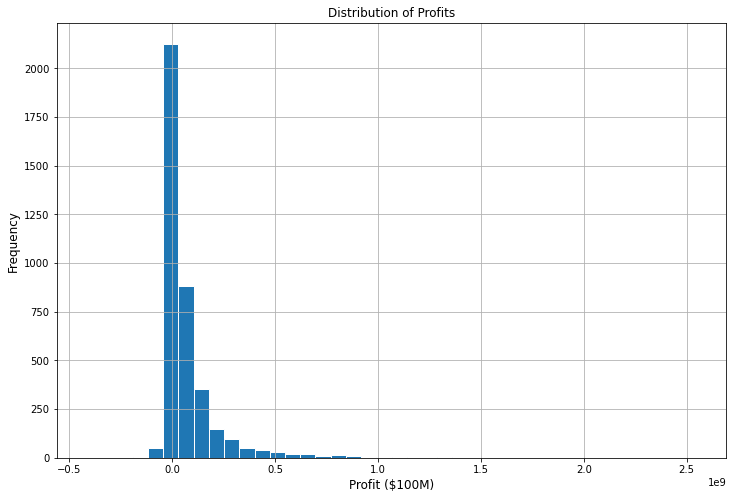

In [28]:
refined_movies['profit'].hist(figsize=(12,8), bins=40, edgecolor='white');
plt.xlabel('Profit ($100M)', fontsize=12);
plt.ylabel('Frequency', fontsize=12);
plt.title('Distribution of Profits');

#### Here we

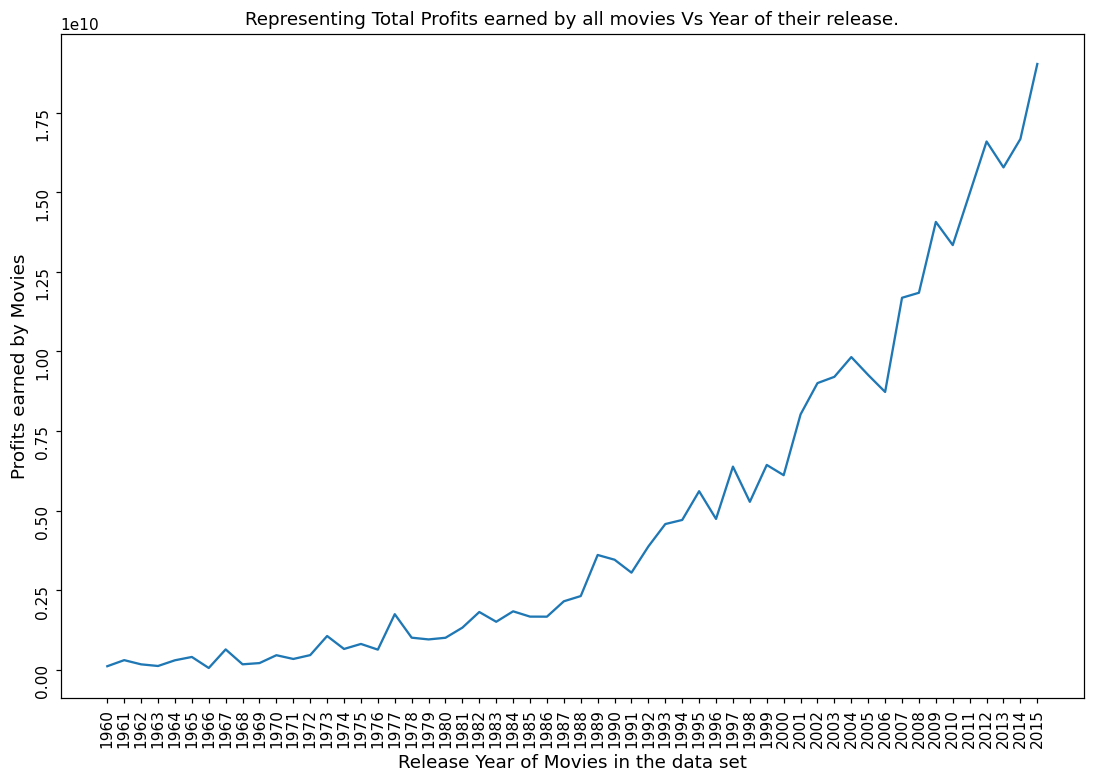

In [29]:
profits_per_year= refined_movies.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,8), dpi = 110)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

plt.xticks(rotation=90)
plt.yticks(rotation=90)

#plotting the graph
plt.plot(profits_per_year)

#displaying the line plot
plt.show()

### In the above graph, we can see the consistent increase in movies profits with time

## Research Question 2 : Most popular movies genre?

In [30]:
start = time.process_time()
def genre(column):
    #will take a column, and separate the string by '|'
    genre = refined_movies[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    genre = pd.Series(genre.split('|'))
    
    #arranging in descending order
    genre_count = genre.value_counts(ascending = False)
    
    return genre_count

In [31]:
#variable to store the retured value
genre_count = genre('genres')
#printing top 5 values
genre_count.head()

Drama        1756
Comedy       1358
Thriller     1204
Action       1085
Adventure     749
dtype: int64

0.15625


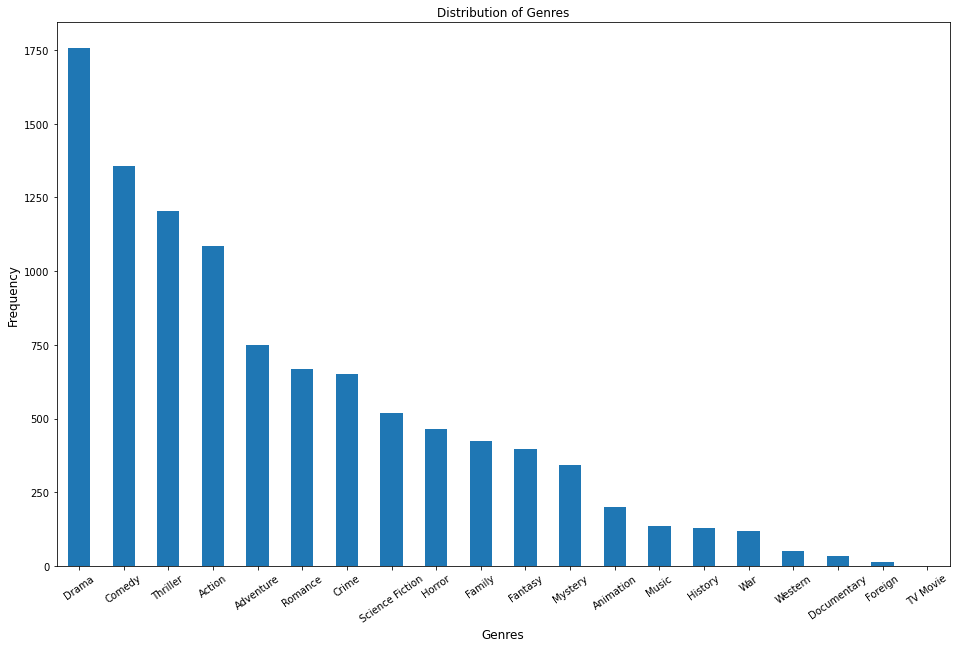

In [32]:
genre_count.plot(kind='bar', figsize=(16,10));
plt.xlabel('Genres', fontsize=12);
plt.ylabel('Frequency', fontsize=12);
plt.title('Distribution of Genres');
plt.xticks(rotation=35);
print(time.process_time() - start);

### In the above graph, Drama is holding the first place as the most popular movie genre with a total of 1756 movies. However, we find that there has been quite a competition between comedy, thriller, action which held the places from second to fourth respectively.

# Alternatively, this great piece of code recommended by the reviewer can be used to achieve the part as the above solution.
### Note: this suggested code had a much lower execution time (0.14 sec) than the old one (0.83 sec).

In [33]:
start = time.process_time()
# split genres string, at |, explode the list to rows
genres_df = refined_movies.assign(genres=refined_movies['genres'].str.split('|').explode('genres'))
genres_df.head(10)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Adventure,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Science Fiction,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Thriller,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09
5,281957,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Adventure,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08,3.979505e+08
6,87101,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08,2.856035e+08
7,286217,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Thriller,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08,4.873803e+08
8,211672,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Adventure,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09,1.082731e+09
9,150540,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Science Fiction,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08,6.787086e+08


In [34]:
# group exploded dataframe by genres, get average popularity
genres_df.groupby('genres').popularity.mean()

genres
Action             1.318898
Adventure          1.302291
Animation          1.367817
Comedy             1.161467
Crime              1.085547
Documentary        1.411553
Drama              1.168401
Family             1.280921
Fantasy            1.177110
Foreign            1.770486
History            1.179740
Horror             1.053771
Music              1.109552
Mystery            1.228471
Romance            1.095085
Science Fiction    1.383023
Thriller           1.253766
War                1.042681
Western            1.305056
Name: popularity, dtype: float64

0.171875


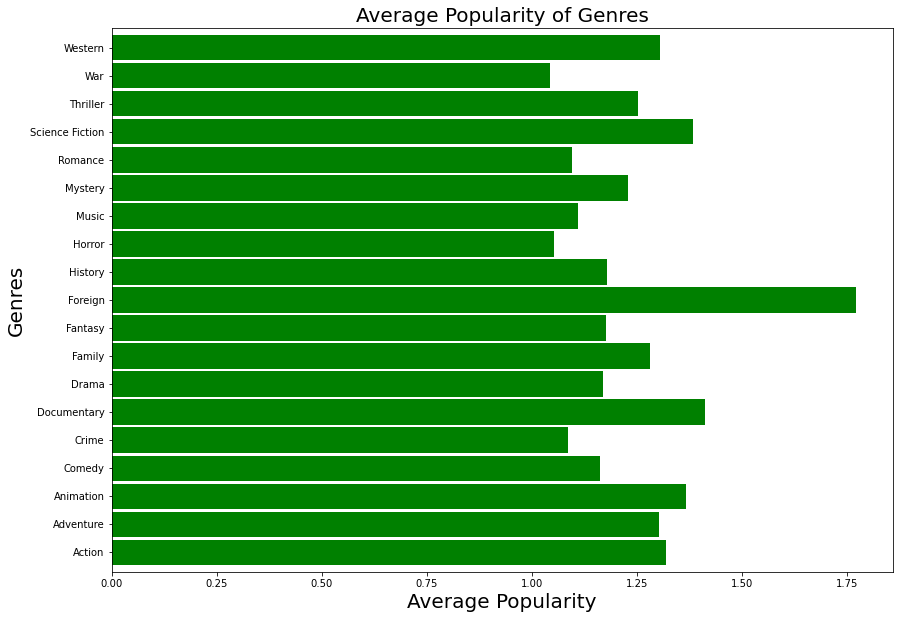

In [35]:
genres_df.groupby('genres').popularity.mean().plot.barh(color='green', figsize=(14,10),width=0.9)
# Plot title
plt.title('Average Popularity of Genres', fontsize=20);
plt.xlabel('Average Popularity',fontsize=20);
plt.ylabel('Genres',fontsize=20);
print(time.process_time() - start)

### In the next graph, we're going to explore the relation between the genre and profit.

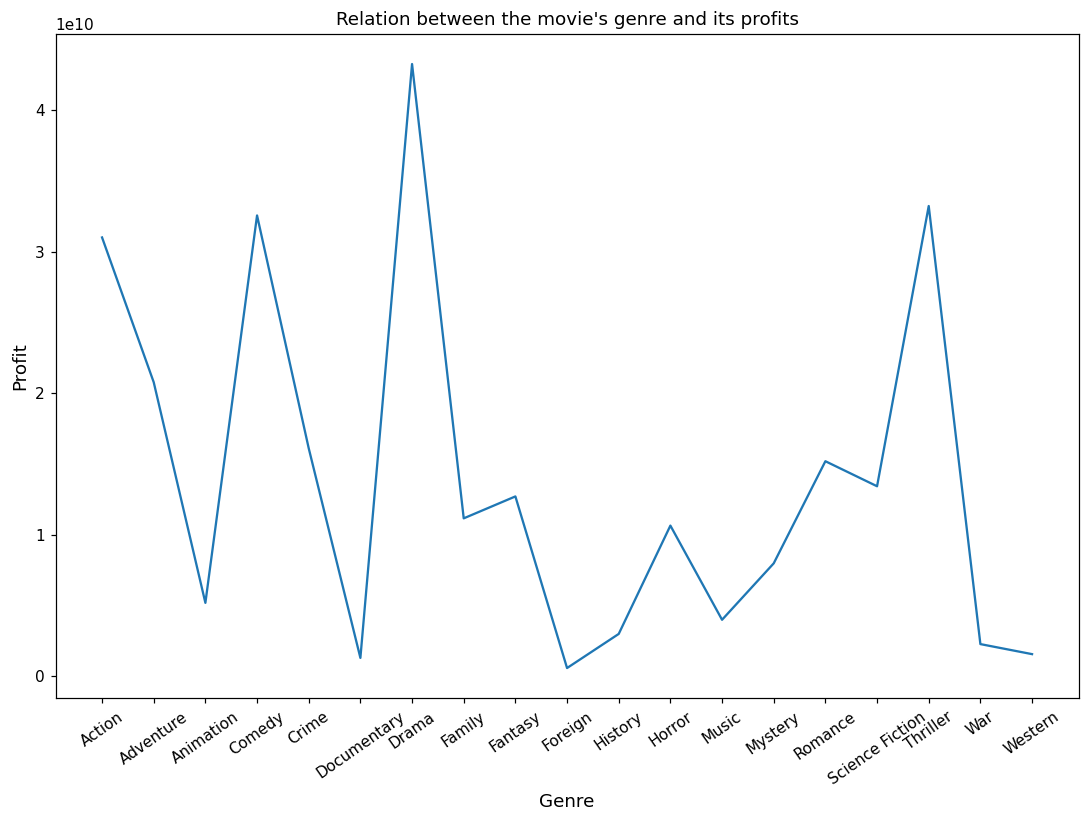

In [36]:
genre_profits= genres_df.groupby('genres')['profit'].sum()
#figure size(width, height)
plt.figure(figsize=(12,8), dpi = 110)

#on x-axis
plt.xlabel('Genre', fontsize = 12)
#on y-axis
plt.ylabel('Profit', fontsize = 12)
#title of the line plot
plt.title("Relation between the movie's genre and its profits")

plt.xticks(rotation=35)
plt.yticks(rotation=0)

#plotting the graph
plt.plot(genre_profits)

#displaying the line plot
plt.show()

#### From the above graph, we can see Drama has the highest profits.
#### However, Thriller came in the 2nd place preceeding the Comedy genre, although Comedy had a higher frequency.

## Research Question 3 : Average movies budget?

In [37]:
refined_movies['budget'].mean()

37203696.954852104

## Research Question 4 : Average movies revenue?

In [38]:
refined_movies['revenue'].mean()

107686616.09807992

# Conclusions:

### From the above very simple analysis, we came up with a few conclusions:

#### 1- There has been a significant consistent increase in the movies profits through the years.

#### 2- The most filmed movie genre is Drama.

#### 3- Average movies budget was found to be 3720397$.

#### 4- Average movies revenue was found to be 107686616$.

# Limitations:

#### Unfortunately, the analysis was done to only 3854 entries out of 10866. And this great cut was due to the incomplete data entries for the budget and revenue columns.

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-dataset-template.ipynb'])

0